<center><strong>Introduction</strong></center>

The purpose of this report to determine what, if any, features of a store sales dataset have an impact on the sales of stores. These features include temperature, fuel prices, markdowns, CPI, dates, unemployment rates, department types, and size. This report has found that date, store size, and department types all have a statistically significant effect on weekly store sales. This report will provide summary statistics on the store features as well as graphs and evidence to support this claim.

<center><strong>Data</strong></center>

Data used for this report is stored in 3 separate datasets. You will find a list of features as well as a list of summary statistics for each category of data. 
The dataset includes the following data:

•	Store, a unique identifier for each store.

•	Temperature, recorded temperature for the day.

•	Fuel_Price, average fuel cost for the area in the immediate vicinity around the store.

•	MarkDown1/2/3/4/5, discounts and markdowns implemented at a store at a specific time.

•	CPI, consumer price index for the area.

•	Unemployment, rates of unemployment for the area around the store.

•	Department, a unique identifier for a specific department at a store.

•	Type, categorization of the type of store in A or B or C format.

•	Date, the date all other variables were recorded.

•	Size, the size of the store in square feet.

•	Weekly_Sales, the total number of sales per week.

<center><strong>Summary Statistics</strong></center>

<br>

<center><strong>Features.csv</strong></center>

|       | Store     | Temperature | Fuel_Price | MarkDown1   | MarkDown2   | MarkDown3   | MarkDown4   | MarkDown5   | CPI        | Unemployment |
|-------|-----------|-------------|------------|-------------|-------------|-------------|-------------|-------------|------------|--------------|
| count | 8190      | 8190        | 8190       | 4032        | 2921        | 3613        | 3464        | 4050        | 7605       | 7605         |
| mean  | 23        | 59.356198   | 3.405992   | 7032.371786 | 3384.176594 | 1760.10018  | 3292.935886 | 4132.216422 | 172.460809 | 7.826821     |
| std   | 12.987966 | 18.678607   | 0.431337   | 9262.747448 | 8793.583016 | 11276.46221 | 6792.329861 | 13086.69028 | 39.738346  | 1.877259     |
| min   | 1         | -7.29       | 2.472      | -2781.45    | -265.76     | -179.26     | 0.22        | -185.17     | 126.064    | 3.684        |
| 25%   | 12        | 45.9025     | 3.041      | 1577.5325   | 68.88       | 6.6         | 304.6875    | 1440.8275   | 132.364839 | 6.634        |
| 50%   | 23        | 60.71       | 3.513      | 4743.58     | 364.57      | 36.26       | 1176.425    | 2727.135    | 182.764003 | 7.806        |
| 75%   | 34        | 73.88       | 3.743      | 8923.31     | 2153.35     | 163.15      | 3310.0075   | 4832.555    | 213.932412 | 8.567        |
| max   | 45        | 101.95      | 4.468      | 103184.98   | 104519.54   | 149483.31   | 67474.85    | 771448.1    | 228.976456 | 14.313       |



<center><strong>Sales.csv</strong></center>

|       | Store     | Dept      | Weekly_Sales |
|-------|-----------|-----------|--------------|
| count | 421570    | 421570    | 421570       |
| mean  | 22.200546 | 44.260317 | 15981.25812  |
| std   | 12.785297 | 30.492054 | 22711.18352  |
| min   | 1         | 1         | -4988.94     |
| 25%   | 11        | 18        | 2079.65      |
| 50%   | 22        | 37        | 7612.03      |
| 75%   | 33        | 74        | 20205.8525   |
| max   | 45        | 99        | 693099.36    |

<center><strong>Stores.csv</strong></center>

|       | Store     | Size        |
|-------|-----------|-------------|
| count | 45        | 45          |
| mean  | 23        | 130287.6    |
| std   | 13.133926 | 63825.27199 |
| min   | 1         | 34875       |
| 25%   | 12        | 70713       |
| 50%   | 23        | 126512      |
| 75%   | 34        | 202307      |
| max   | 45        | 219622      |



<center><strong>Methods</strong></center>
Data was gathered from Kaggle. Source:

https://www.kaggle.com/code/aremoto/retail-sales-forecast

This project was under time constraints and was focused on limiting the creation of new variables and the transformation of data so that the project remained feasible. After data was gathered several steps were taken to clean and manipulated the data.

•	All three datasets were merged on Store ID to create a single dataframe.

•	The date feature was transformed into an integer so that analysis could be performed.

•	Dummy variables were created for store type. These dummy variables are Type_A, Type_B, and Type_C.

•	NA values were changed from NULL to integer (replaced with 0’s.

Data manipulation was performed using pandas as well as datetime. Graphs were generated using seaborn, matplotlib.pyplot, and seaborn. Regression models were developed with sklearn as well as statsmodels.


In [1]:
#importing modules, reading in .csv's
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import datetime as ddt
import statsmodels.api as sm

feat = pd.read_csv("features.csv",encoding='latin1')
sales = pd.read_csv("sales.csv",encoding='latin1')
stores = pd.read_csv("stores.csv",encoding='latin1')

In [2]:
feat['Date'] = pd.to_datetime(feat['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [3]:
#merging datasets on Store ID
df = pd.merge(sales, stores, on=['Store'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-05-02,24924.50,False,A,151315
1,1,1,2010-12-02,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-05-03,21827.90,False,A,151315


In [4]:
#merging datasets on Store ID
df1 = pd.merge(df, feat, on = ['Store', 'Date', 'IsHoliday'])
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [5]:
#creating copy of dataframe that keeps date intact
retail = df1
retail.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [6]:
#grouping sales by date
avgSales = retail.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
avgSales.head()


,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [7]:
#changing date to int
df1['Date'] = pd.to_datetime(df1['Date']).astype('int64')
df1.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,1351209600000000000,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,1351209600000000000,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,1351209600000000000,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,1351209600000000000,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,1351209600000000000,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


<center><strong>Analysis</strong></center>

A graph was generated to depict date and weekly sales (listed below). The graph shows a strong correlation with dates and sales. Sales are shown to spike from October to January. The time around Christmas shows the highest number of sales, followed by the thanksgivings and October. This pattern repeats the following year.


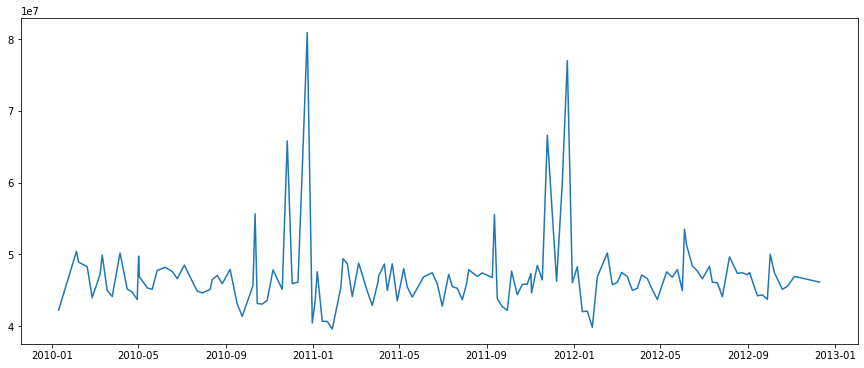

In [8]:
#plotting weekly sales, clearly Weekly_Sales and Date are correlated
plt.figure(figsize=(15,6))
plt.plot(avgSales.Date, avgSales.Weekly_Sales)
plt.show()

A heatmap is generated to depict correlations between the different features. Size and department both seem to show a weak but positive correlation with weekly sales (0.24 and 0.15, respectively). Other interesting artifacts include date showing a strong positive correlation with fuel price as well as one markdown (MarkDown4) having a string positive correlation with another (MarkDown1, 0.82). IsHoliday also have a weak/medium positive relationship with several of the markdowns (MarkDown2, MarkDown3, 0.33, 0.43 respectively). This makes sense given that certain holidays are associated with store markdowns.

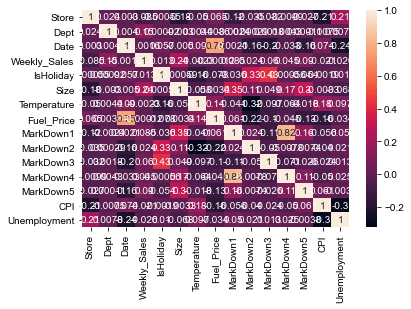

                 Store      Dept      Date  Weekly_Sales  IsHoliday      Size  \
Store         1.000000  0.024004  0.003045     -0.085195  -0.000548 -0.182881   
Dept          0.024004  1.000000  0.004002      0.148032   0.000916 -0.002966   
Date          0.003045  0.004002  1.000000     -0.001570   0.057352 -0.005020   
Weekly_Sales -0.085195  0.148032 -0.001570      1.000000   0.012774  0.243828   
IsHoliday    -0.000548  0.000916  0.057352      0.012774   1.000000  0.000593   
Size         -0.182881 -0.002966 -0.005020      0.243828   0.000593  1.000000   
Temperature  -0.050097  0.004437  0.089905     -0.002312  -0.155949 -0.058313   
Fuel_Price    0.065290  0.003572  0.752944     -0.000120  -0.078281  0.003361   
MarkDown1    -0.119588 -0.002426  0.002117      0.085251  -0.035586  0.345673   
MarkDown2    -0.035173  0.000290 -0.160212      0.024130   0.334818  0.108827   
MarkDown3    -0.031556  0.001784 -0.195340      0.060385   0.427960  0.048913   
MarkDown4    -0.009941  0.00

In [9]:
#generating a heat map
sns.heatmap(df1.corr(), annot=True)
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()
print(df1.corr())

A graph is generated to visually confirm the suspicion that both store size and department number are both correlated with higher sales. The charts below depict the obvious effect of store size on weekly sales. Larger stores seem to generate more sales. Department number is less clear. Although certain departments clearly generated less sales, the chart itself is not indicative of a relationship between the two.

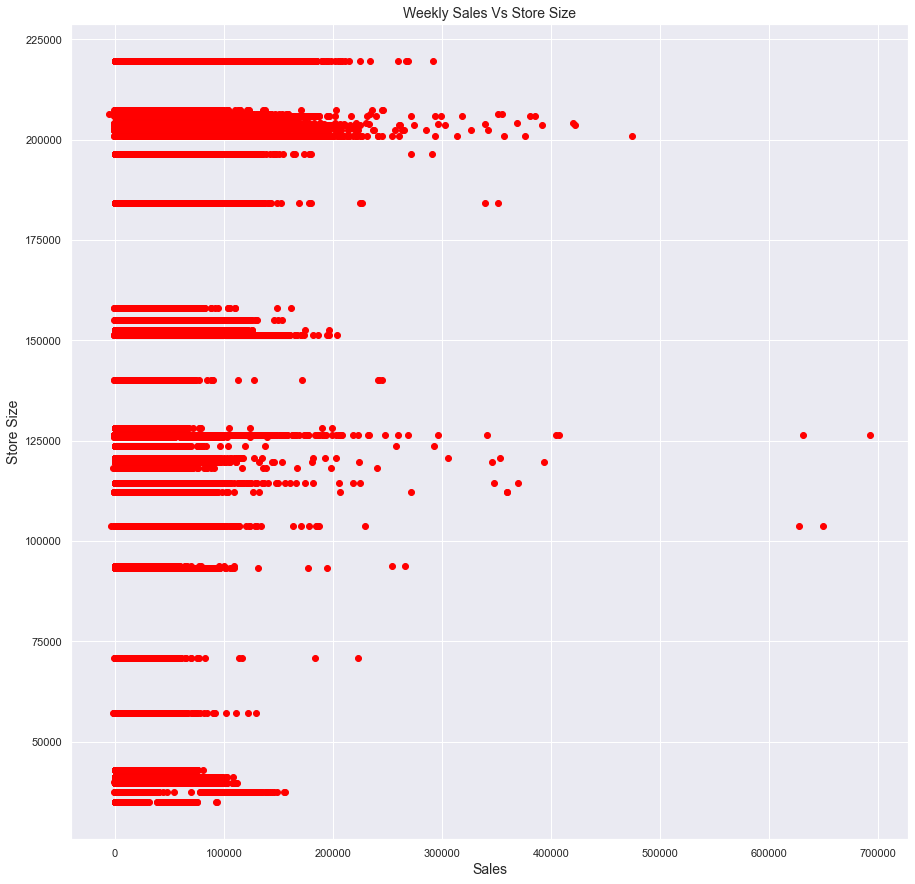

In [10]:
plt.scatter(df1['Weekly_Sales'], df['Size'], color='red')
plt.title('Weekly Sales Vs Store Size', fontsize=14)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Store Size', fontsize=14)
plt.grid(True)
plt.show()

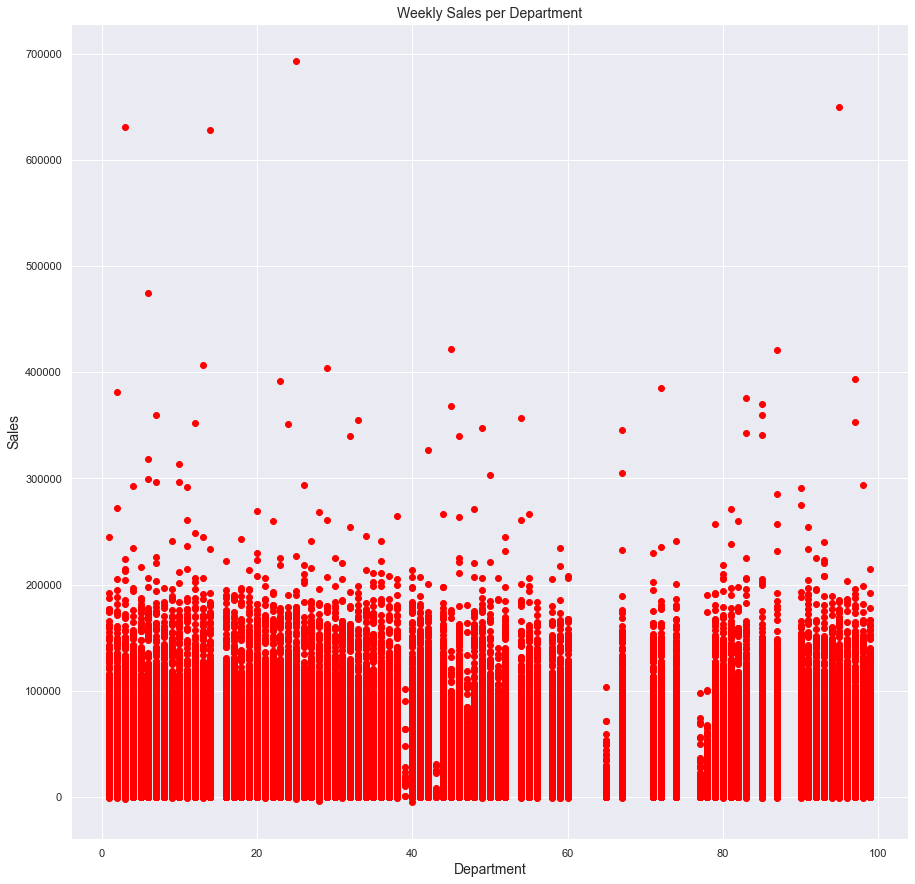

In [11]:
plt.scatter(df1['Dept'], df['Weekly_Sales'], color='red')
plt.title('Weekly Sales per Department', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
dummies = pd.get_dummies(df1)
dummies = dummies.fillna(0)
dummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
0,1,1,1272758400000000000,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
1,1,2,1272758400000000000,50605.27,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
2,1,3,1272758400000000000,13740.12,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
3,1,4,1272758400000000000,39954.04,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
4,1,5,1272758400000000000,32229.38,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0


In [13]:
x = dummies[['Store', 'Dept', 'Date', 'IsHoliday','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type_A','Type_B','Type_C']]
y = dummies['Weekly_Sales']
regr = linear_model.LinearRegression()
model = regr.fit(x, y)
print(regr)
response = model.predict(x)
r2 = model.score(x, y)
print(r2)
x.head()
y2 = model.predict(x)
print(y2)

LinearRegression()
0.08577325093796762
[13532.55515027 13643.98214954 13755.40914881 ... 16654.2762235
 16877.13022203 16988.5572213 ]


Using all features in the dataset a multiple linear regression model was developed to predict future weekly sales against the actual retail sales. A graph was developed to determine the accuracy of the model. The actual sales shape is depicted by red. The model shape is in blue. As you can see, the model is not accurate to be useful. The model will need to be tuned in order to become useful. Two additional graphs were generated. One used the previous model, and another was generated using only store size and departments as predictors. Note that a 0 is missing for y axis labels (ex 20000 should be 200000).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-10000.0, 100000.0)

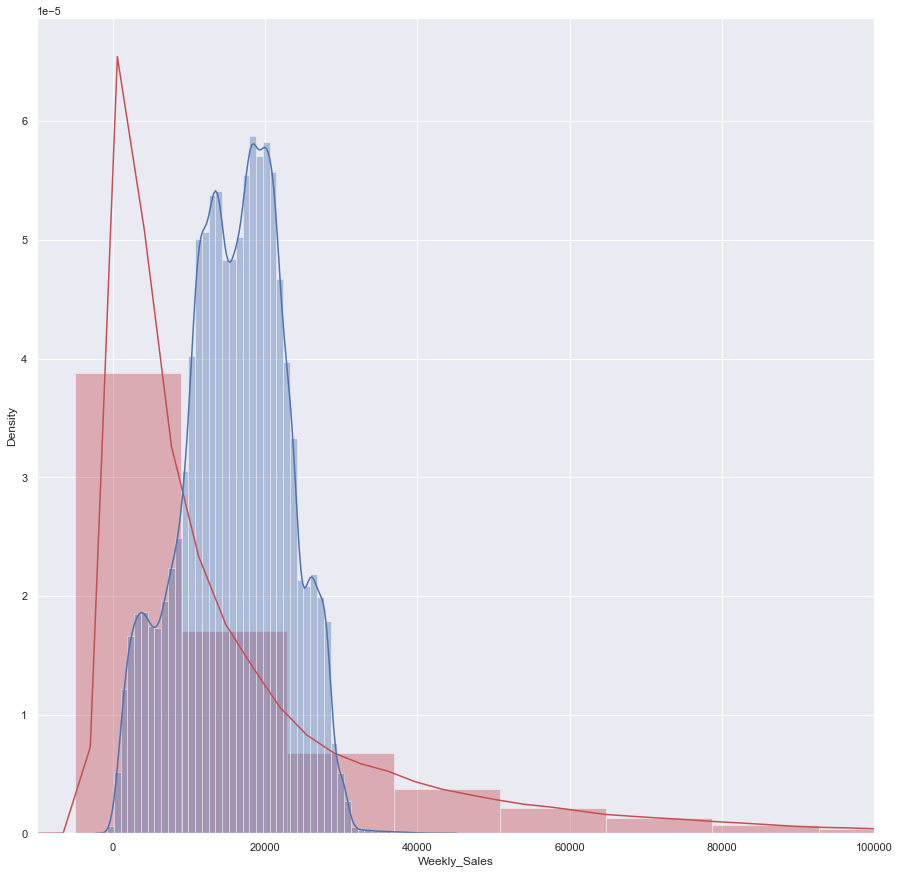

In [14]:
ax1 = sns.distplot(y, color="r", label="Actual Value")
sns.distplot(y2, color="b", label="Fitted Values" , ax=ax1)
plt.xlim(-10000, 100000)

Text(0.5, 1.0, 'Weekly Sales VS Predicted Weekly Sales')

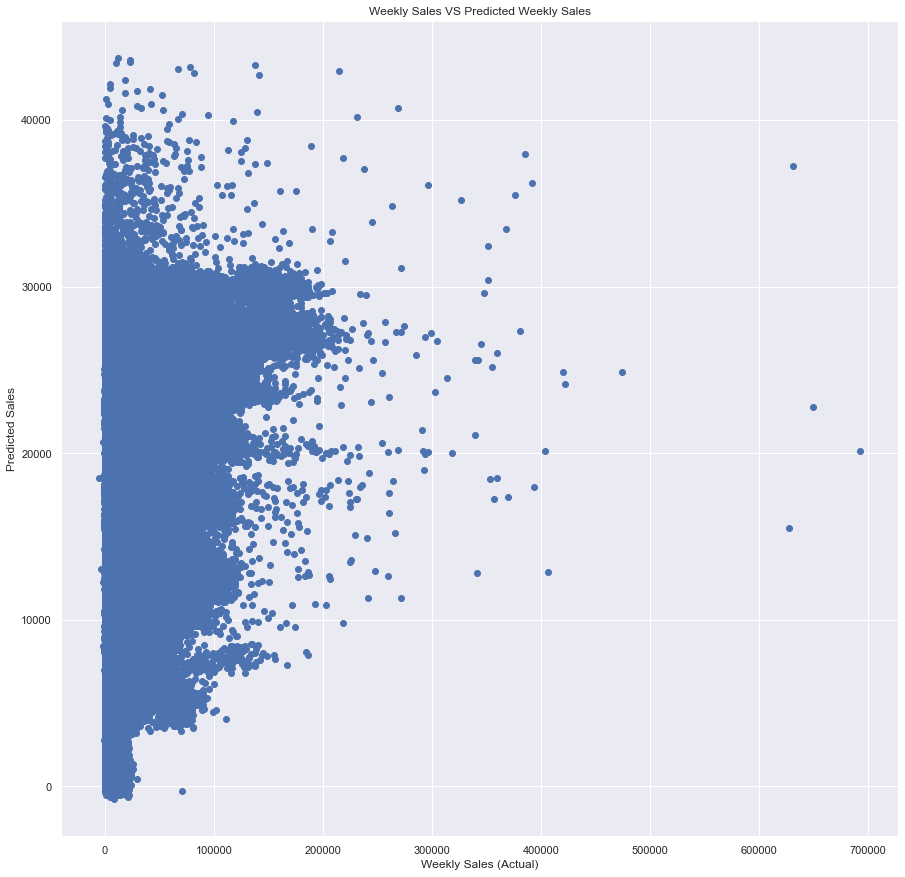

In [15]:
plt.scatter(y, model.predict(x))
plt.xlabel('Weekly Sales (Actual)')
plt.ylabel('Predicted Sales')
plt.rcParams["figure.figsize"] = (15,15) # Custom figure size in inches
plt.title("Weekly Sales VS Predicted Weekly Sales")

In [16]:
x = dummies[['Store', 'Dept']]
y = dummies['Weekly_Sales']
regr = linear_model.LinearRegression()
model = regr.fit(x, y)
print(regr)
response = model.predict(x)
r2 = model.score(x, y)
print(r2)
x.head()
y2 = model.predict(x)
print(y2)

LinearRegression()
0.029794293016592976
[14486.95012024 14598.79540494 14710.64068964 ... 18059.88745404
 18283.57802344 18395.42330815]


Text(0.5, 1.0, 'Weekly Sales VS Predicted Weekly Sales')

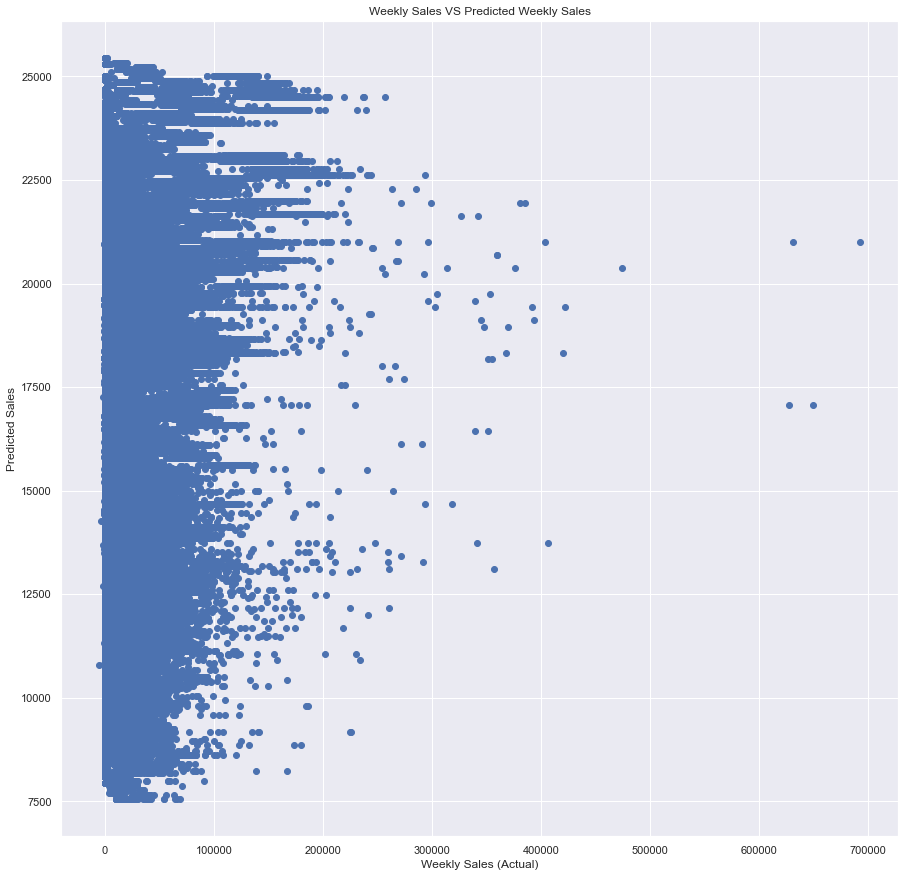

In [17]:
plt.scatter(y, model.predict(x))
plt.xlabel('Weekly Sales (Actual)')
plt.ylabel('Predicted Sales')
plt.rcParams["figure.figsize"] = (15,15) # Custom figure size in inches
plt.title("Weekly Sales VS Predicted Weekly Sales")

<center><strong>Results</strong></center>

As can be seen from the associated graphs the model developed using all features is not accurate. The model developed using only store size and department number was considerably more accurate. From our analysis we can determine a few things.
1.	Date has a significant impact on the ebbs and flows of weekly sales.
2.	Store size is highly correlated with weekly sales. Larger stores perform better.
3.	Certain departments consistently have higher or lower sales than others.


<center><strong>Conclusions</strong></center>

The purpose of this report to see what, if any, features have an affect on weekly sales. We have determined that date, store size, and certain departments all have a statistically significant impact on weekly sales. 
Our model, however, is imperfect. It is not accurate enough to be useful for a prediction. The model should continue to be developed by including more features and accounting for seasonality within the data. There may also be a way to account for confounding variables. For example, location and population size may have a strong correlation with store size. Store size’s correlation with weekly sales may be influenced by these secondary features. We also see how date clearly has an affect on sales despite our heatmap. Better date data transformation may increase accuracy of results.
